<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%EC%8B%A4%EC%8A%B5_%EB%B6%84%EB%A5%98_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC as SVC

In [ ]:
import matplotlib.pyplot as plt



# SVM: Support Vector Machine

## IRIS 데이터셋 로드



In [ ]:
iris = load_iris()
X = iris['data'][:, :2]
y = iris['target']

X.shape, y.shape

((150, 2), (150,))

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
names = iris['target_names']
feature_names = iris['feature_names']

names, feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [ ]:
# Scale data to have mean 0 and variance 1
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

## Visualize the Data

In [ ]:
def visualize_data(X,y):
  colors = ['m', 'g', 'y']
  fig, ax1 = plt.subplots(1, 1, figsize=(3, 3))
  for target, target_name in enumerate(names):
      X_plot = X[y == target]
      ax1.plot(X_plot[:, 0], X_plot[:, 1],linestyle='none', marker='o', color=colors[target],  label=target_name)
  ax1.set_xlabel(feature_names[0])
  ax1.set_ylabel(feature_names[1])
  ax1.axis('equal')
  ax1.legend()


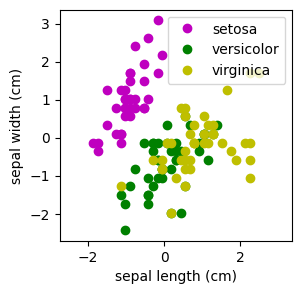

In [ ]:
visualize_data(X_train, y_train)

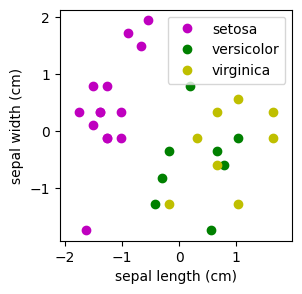

In [ ]:
visualize_data(X_test, y_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Test 데이터에 대해서 정확도 평가
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print(f'총 개수: {len(y_test)}, 틀린개수:{(y_test != y_pred).sum()}')
print(f'분류 정확도 : {100.0* accuracy_score(y_test, y_pred):.3f}%')

총 개수: 30, 틀린개수:7
분류 정확도 : 76.667%


In [ ]:
from sklearn.metrics import *

# Confusion Matrix
cm =confusion_matrix(y_test, y_pred)
print(cm)

[[13  1  0]
 [ 0  4  4]
 [ 0  2  6]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.57      0.50      0.53         8
           2       0.60      0.75      0.67         8

    accuracy                           0.77        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.78      0.77      0.77        30



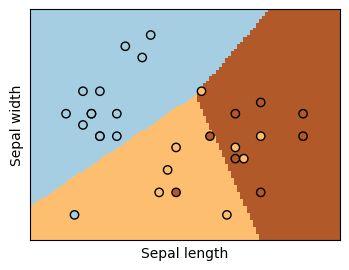

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.show()

## Support Vector Machine


In [ ]:
from sklearn import svm

clf = Pipeline(
    [
        #("scaler", StandardScaler()),
        ("svc", svm.LinearSVC()),
    ]
)
clf.fit(X_train, y_train)

Pipeline(steps=[('svc', LinearSVC())])

In [ ]:
y_pred = clf.predict(X_test)

print(f'총 개수: {len(y_test)}, 틀린개수:{(y_test != y_pred).sum()}')
print(f'분류 정확도 : {100.0* accuracy_score(y_test, y_pred):.3f}%')

총 개수: 30, 틀린개수:6
분류 정확도 : 80.000%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.67      0.50      0.57         8
           2       0.64      0.88      0.74         8

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.81      0.80      0.80        30



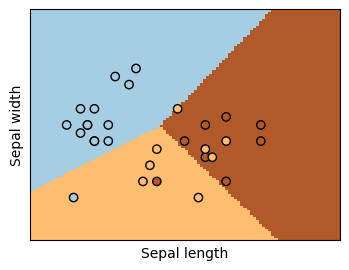

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.show()

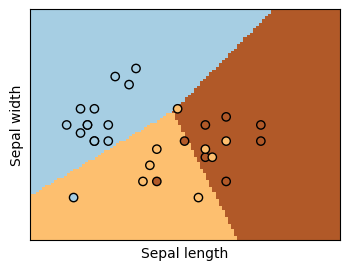

In [ ]:
# logistic regression 모델과 비교

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.show()

## Decision Tree

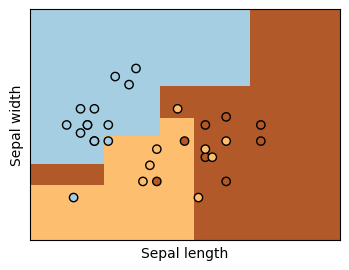

In [ ]:
# logistic regression 모델과 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.show()